# AIOKraken Tutorial
For more information, please check http://github.com/asmodehn/aiokraken


In [1]:
%pip install -e .
from aiokraken.rest.client import RestClient
from aiokraken.rest.api import Server

Obtaining file:///opt/Projects/aiokraken
  Found existing installation: aiokraken 2.0.0
    Uninstalling aiokraken-2.0.0:
      Successfully uninstalled aiokraken-2.0.0
  Running setup.py develop for aiokraken
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
kraken = RestClient(Server())

In [3]:
await kraken.time()

/0/public/Time


Sat Sep  7 16:41:22 2019

In [6]:
# polling ohlc
ohlc = await kraken.ohlc(pair='XBTEUR')
print(ohlc.head())

         time    open    high     low   close    vwap      volume  count
0  1567824120  9398.7  9400.9  9398.7  9400.9  9400.9  0.00378568      1
1  1567824180  9400.9  9400.9  9393.3  9393.3  9397.7  0.03249832      2
2  1567824240  9393.3  9393.3  9390.6  9390.6  9390.6  0.04995000      2
3  1567824300  9390.6  9394.8  9390.6  9391.0  9391.4  0.07826344      6
4  1567824360  9391.0  9391.0  9391.0  9391.0     0.0  0.00000000      0


<Figure size 504x360 with 0 Axes>

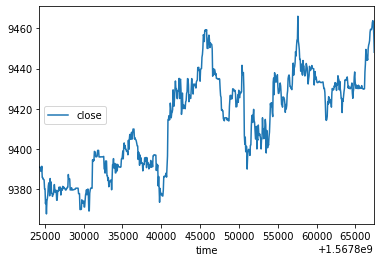

In [10]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import collections
import time
%matplotlib inline

# def live_plot(data_dict, figsize=(7,5), title=''):
#     clear_output(wait=True)
#     plt.figure(figsize=figsize)
#     for label,data in data_dict.items():
#         plt.plot(data, label=label)
#     plt.title(title)
#     plt.grid(True)
#     plt.xlabel('epoch')
#     plt.legend(loc='center left') # the plot evolves to the right
#     plt.show();
    
for i in range(10):  # how to interactively stop this ?  DO we even need it ? probably not for REST interface anyway...
    clear_output(wait=True)
    plt.figure(figsize=(7,5))
    
    ohlc_df = await kraken.ohlc(pair='XBTEUR') #since=ohlc.get('last'))
    # convert what we want to draw to numeric to please mpl
    ohlc_df.dataframe.close = pd.to_numeric(ohlc_df.dataframe.close)
    #ohlc_df.time = pd.to_datetime(ohlc_df.time, unit='s')
    ohlc_df.dataframe.plot(x='time', y='close') 
    
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show()
     
    time.sleep(10.0)  # careful with rate limits...

In [11]:
from IPython.display import clear_output
import numpy as np
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

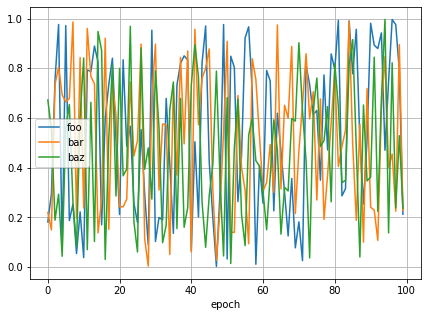

In [12]:
import time

data = collections.defaultdict(list)
for i in range(100):
    time.sleep(1.0)
    data['foo'].append(np.random.random())
    data['bar'].append(np.random.random())
    data['baz'].append(np.random.random())
    live_plot(data)